In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist

def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [3]:
def image_color_cluster(image_path, k = 5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters = k)
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()

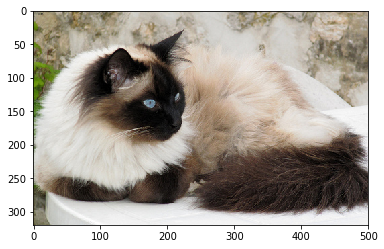

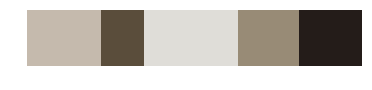

In [4]:
image_path = "/data/dev/pets/images/Birman_148.jpg"

#preview image
image = mpimg.imread(image_path)
plt.imshow(image)

image_color_cluster(image_path)

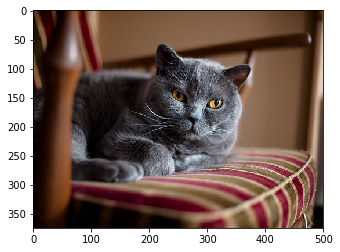

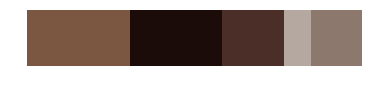

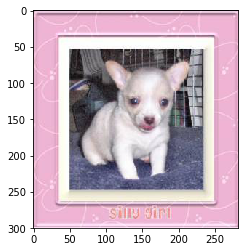

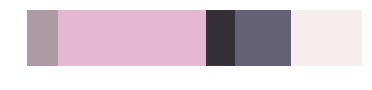

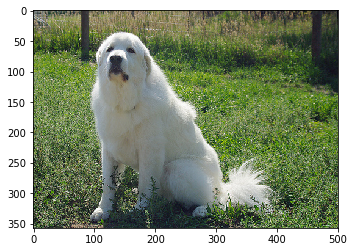

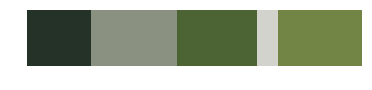

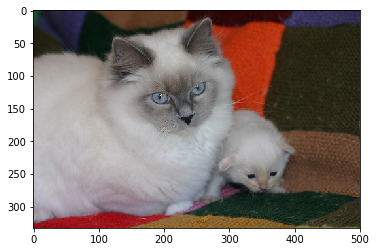

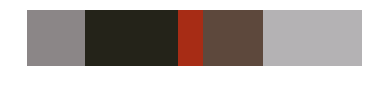

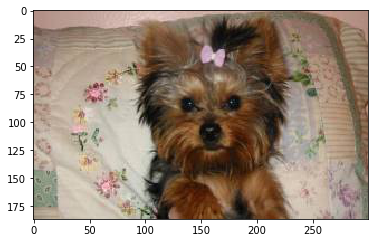

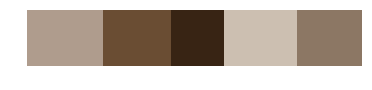

In [5]:
images = [
    '/data/dev/pets/images/British_Shorthair_106.jpg',
    '/data/dev/pets/images/chihuahua_139.jpg',
    '/data/dev/pets/images/great_pyrenees_89.jpg',
    '/data/dev/pets/images/Ragdoll_8.jpg',
    '/data/dev/pets/images/yorkshire_terrier_140.jpg'
]


for image_path in images:
    image = mpimg.imread(image_path)
    plt.imshow(image)

    image_color_cluster(image_path)